# Ford GoBike System Data of 2018

## About Dataset

#### This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

## Purpose of Analysis

#### In the Ford GoBike dataset,the focus is on the start time(hour,day,month) in order to investigate when the bikes are in high demand and by which type of user.

In [1]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Load the dataset
df_clean = pd.read_csv('master_bike_data.csv')

In [3]:
#display the few records pf the dataset
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_min,start_time_month,start_time_day,start_time_hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1254.733333,January,Wed,22
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,1423.700000,January,Wed,16
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,1192.933333,January,Wed,14
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,1017.933333,January,Wed,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,666.100000,January,Wed,19


### 1. Which user type is using more Go Bikes?

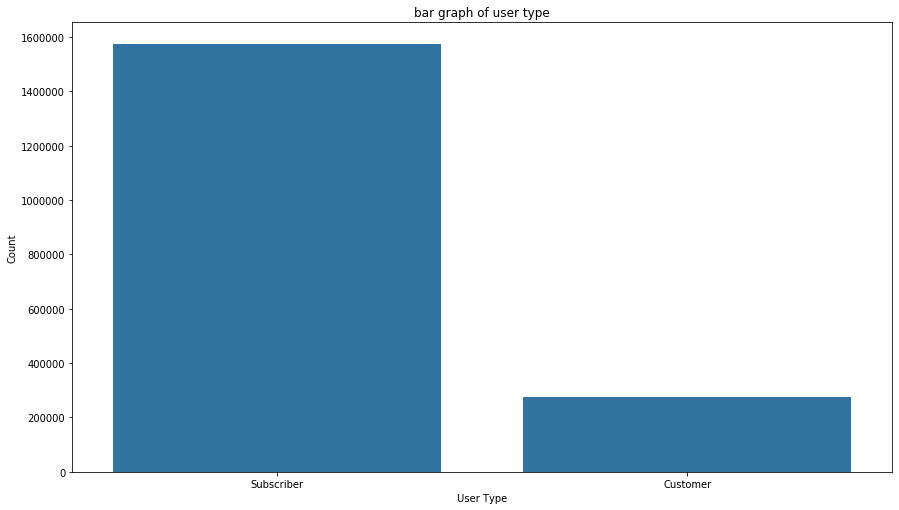

In [4]:
#Plot bar graph of user type to know which user type is more in number.
plt.figure(figsize=[14.70, 8.27])
base_color= sb.color_palette()[0]
sb.countplot(data = df_clean,x='user_type',color = base_color)
plt.title("bar graph of user type")
plt.xlabel('User Type');
plt.ylabel('Count');

### Result:

#### Thus Subscriber uses more number of Go bikes.

### 2. Among Customesr and subscribers who is doing more bike sharing?

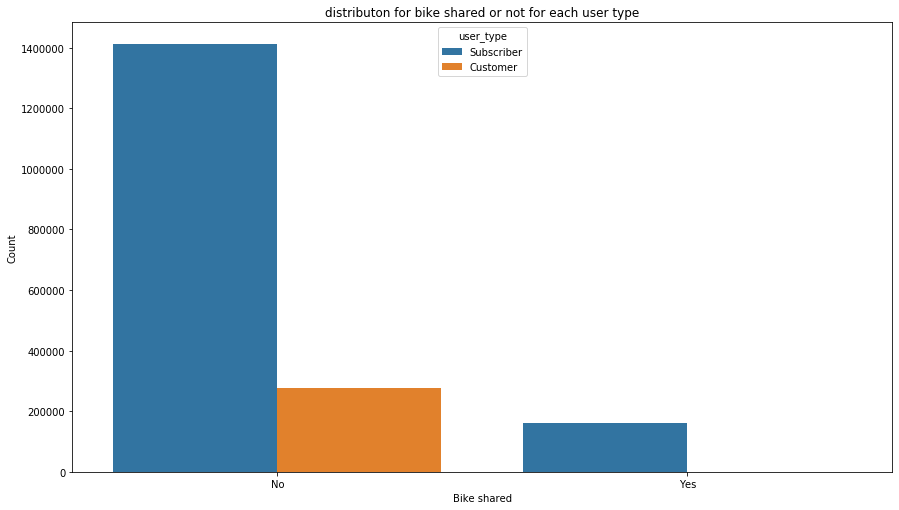

In [5]:
#plot distributon for bike shared or not for each user type.
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=df_clean,x='bike_share_for_all_trip',hue='user_type')
plt.title("distributon for bike shared or not for each user type")
plt.xlabel('Bike shared');
plt.ylabel('Count');

### Result:

#### Above graph shows the unexpected result as no Customer is using bike sharing. So Subscribers only used the bike sharing.

### 3. What's the monthly and daily average usage of bikes?


### Monthly average usage of bikes

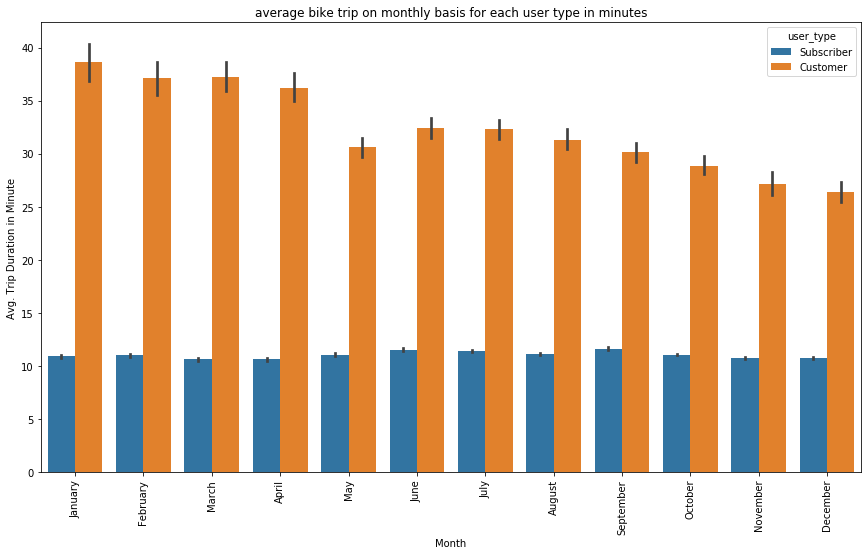

In [6]:
#Plot average bike trip on monthly basis for each user type in minutes.
plt.figure(figsize=[14.70, 8.27])
sb.barplot(data=df_clean, x='start_time_month', y='duration_min',hue='user_type');
plt.xticks(rotation=90);
plt.title("average bike trip on monthly basis for each user type in minutes")
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');
plt.show();


### Result:

#### Monthly Average trip duration is more in case of Customer as compared to Subscribers and in month of January, it's the maximum of around 38 minutes.
#### Subscribes show a consistent average throughout the year.

### Daily average usage of bikes

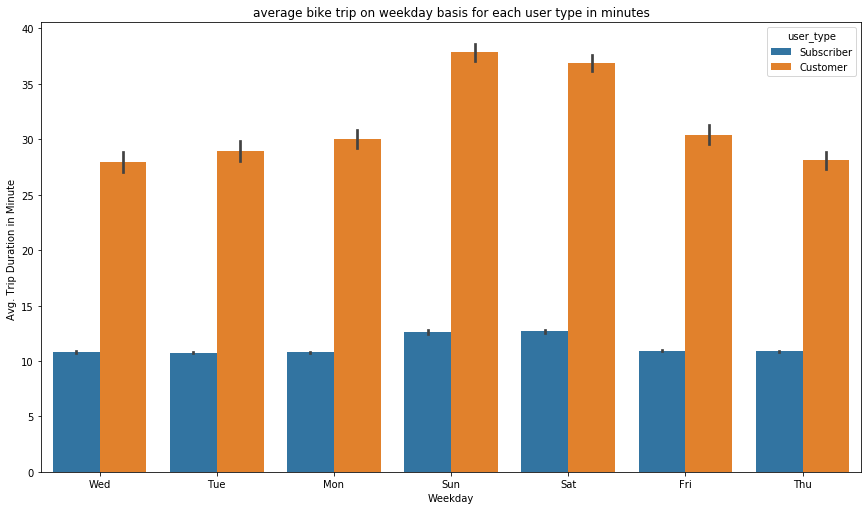

In [7]:
#Plot average bike trip on weekday basis for each user type in minutes.
plt.figure(figsize=[14.70, 8.27])
sb.barplot(data=df_clean, x='start_time_day', y='duration_min',hue='user_type');
plt.title("average bike trip on weekday basis for each user type in minutes")
plt.xlabel('Weekday');
plt.ylabel('Avg. Trip Duration in Minute ');
plt.show();

### Result:

#### For both Subscribers and Customers , avg. trip duration is more on saturday and Sunday as it's weekend. 
#### Overall average trip duration of Customers is more than Subscribers.

### 4. How hourly usage vary during weekdays for each user types?

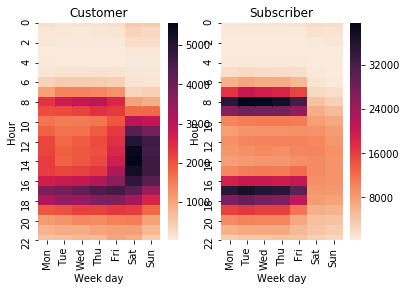

In [8]:
#Plot hourly usage vs weekday for each user type
#plt.figure(figsize=(9,8))
plt.tight_layout()

df_clean['start_time_day'] = pd.Categorical(df_clean['start_time_day'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)


plt.subplot(1,2,1)
Cust = df_clean.query('user_type in "Customer"').groupby(['start_time_hour', 'start_time_day']).size().reset_index(name='count')
Cust = Cust.pivot("start_time_hour", "start_time_day", "count")
sb.heatmap(Cust, cmap='rocket_r');
plt.title("Customer")
plt.xlabel('Week day');
plt.ylabel('Hour');




plt.subplot(1,2,2)
Cust = df_clean.query('user_type in "Subscriber"').groupby(['start_time_hour', 'start_time_day']).size().reset_index(name='count')
Cust = Cust.pivot("start_time_hour", "start_time_day", "count")
sb.heatmap(Cust, cmap='rocket_r');
plt.title("Subscriber")
plt.xlabel('Week day');
plt.ylabel('Hour');




### Result:

#### Above two heatmaps gives the clear comparison of the rides between Customer and Subscribers which is as follows:

###  Customers:
   1. Customers travelled more during weekends.
   2. Between 3 to 7 p.m. more rides were taken by Customers during weekdays.
   
### Subscribers: 
   1. Subscribers travelled very less during weekends.
   2. In morning  from 8-9a.m and in evening from 5-6 p.m., they use more rides to travel for office and then came back      to home in evening.
     

## Summary

Overall more numbers of subscribers are using the bikes as compared to customers. Almost all the subscribers are using bikes to reach their office in the morning and to go back to home in the evening but customers are using more between afternoon and evening times may be to go to market or some fun purposes.The average time duration during weekdays of the customers is thrice more than that of customers. During weekends ,Customers are using more rides as compared to Subscribers.

In [10]:
!jupyter nbconvert "Explanatory Data Analysis.ipynb" --to slides --template output-toggle.tpl 


[NbConvertApp] Converting notebook Explanatory Data Analysis.ipynb to slides
[NbConvertApp] Writing 408711 bytes to Explanatory Data Analysis.slides.html
